In [7]:
from functools import partial
from fvhoe.boundary_conditions import BoundaryCondition
from fvhoe.initial_conditions import sedov
from fvhoe.solver import EulerSolver
import matplotlib.pyplot as plt
import numpy as np
import sys

sys.path.append("../../examples")

from sedov import sedov_rduP

In [8]:
# sedov blast params
t = 1
gamma = 1.4

# set up numerical solution
N = 320
p = 4

solver = EulerSolver(
    w0=partial(sedov, dims="xy", mode="corner", E0=1e-12, E1=1),
    bc=BoundaryCondition(x=("reflective", "outflow"), y=("reflective", "outflow")),
    gamma=gamma,
    conservative_ic=True,
    fv_ic=True,
    x=(0, 1.1),
    y=(0, 1.1),
    nx=N,
    ny=N,
    px=p,
    py=p,
    riemann_solver="hllc",
    a_posteriori_slope_limiting=p > 0,
    NAD=1e-5,
    slope_limiter="moncen",
    density_floor=True,
    pressure_floor=True,
    snapshots_as_fv_averages=False,
    cupy=True,
)

# run simulation
solver.rkorder(t, snapshot_dir="../../snapshots/zhang-shu-sedov")

Read from snapshot directory ../../snapshots/zhang-shu-sedov


/home/jp7427/.conda/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/fromnumeric.py:3504: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/home/jp7427/.conda/envs/fvhoe-env/lib/python3.11/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


t=1.0, x=[0.0017187500000000002, 1.09828125], y=[0.0017187500000000002, 1.09828125], z=0.5
horizontal_axis='x', vertical_axis='y'


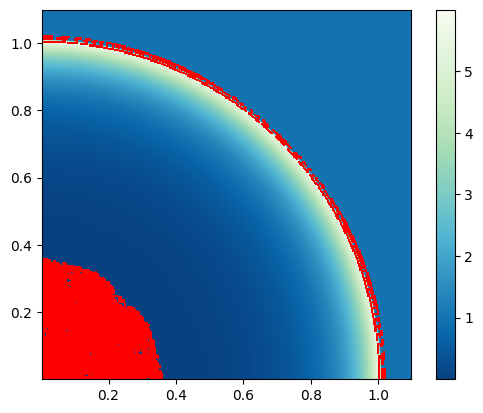

In [13]:
fig, ax = plt.subplots()

im = solver.plot_2d_slice(ax, param="rho", z=0.5, cmap="GnBu_r", overlay_trouble=True)
plt.colorbar(im)

fig.savefig("../../snapshots/zhang-shu-sedov/rho.png", dpi=300, bbox_inches="tight")

In [ ]:
v = np.sqrt(
    np.square(solver.snapshots[-1]["w"].vx) + np.square(solver.snapshots[-1]["w"].vy)
)

np.mean(
    np.abs(
        solver.snapshots[-1]["w"].vx - np.swapaxes(solver.snapshots[-1]["w"].vy, 0, 1)
    )
)

In [ ]:
fig, axs = plt.subplots(3, 1)

marker_config = dict(linestyle="none", marker=".", markersize=3)

axs[0].set_ylabel(r"$\rho$")
solver.plot_1d_slice(axs[0], param="rho", y=0, z=0.5, **marker_config)

axs[1].set_ylabel(r"$P$")
solver.plot_1d_slice(axs[1], param="P", y=0, z=0.5, **marker_config)

axs[2].set_ylabel(r"$v$")
solver.plot_1d_slice(axs[2], param="vx", y=0, z=0.5, **marker_config)